# Data

In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import torchmetrics
import matplotlib.pyplot as plt
import math

In [2]:
device = "mps" if torch.backends.mps.is_available() \
    else "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
train_df = pd.read_csv("/kaggle/input/geolife-data/geolife_train_filtered_df.csv")
train_df

,lat,lon,alt,time,label,tid,time_diff,partition,distance,speed,acceleration,bearing,pitch,user
0,31.445176,91.989489,4522.9272,2008-10-01 05:58:52,0,010_101,0.0,010_101_0,0.000000,0.000000,0.000000,0.000000,0.0,10
1,31.445176,91.989506,4522.9272,2008-10-01 05:58:53,0,010_101,1.0,010_101_0,1.612702,1.612702,1.612702,89.999996,0.0,10
2,31.445183,91.989559,4522.9272,2008-10-01 05:58:54,0,010_101,1.0,010_101_0,5.087728,5.087728,3.475026,81.199824,0.0,10
3,31.445186,91.989575,4522.9272,2008-10-01 05:58:55,0,010_101,1.0,010_101_0,1.554062,1.554062,-3.533666,77.604795,0.0,10
4,31.445196,91.989609,4522.9272,2008-10-01 05:58:56,0,010_101,1.0,010_101_0,3.411694,3.411694,1.857632,70.978492,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842192,39.991445,116.327465,279.5016,2008-08-21 10:25:42,0,179_9,2.0,179_9_1,0.000000,0.000000,0.000000,0.000000,0.0,179
3842193,39.991445,116.327465,279.5016,2008-08-21 10:25:44,0,179_9,2.0,179_9_1,0.000000,0.000000,0.000000,0.000000,0.0,179
3842194,39.991445,116.327465,279.5016,2008-08-21 10:25:46,0,179_9,2.0,179_9_1,0.000000,0.000000,0.000000,0.000000,0.0,179
3842195,39.991445,116.327465,279.5016,2008-08-21 10:25:48,0,179_9,2.0,179_9_1,0.000000,0.000000,0.000000,0.000000,0.0,179


In [4]:
train_df.describe()

,lat,lon,alt,label,time_diff,distance,speed,acceleration,bearing,pitch,user
count,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06,3.842197e+06
mean,3.941447e+01,1.142104e+02,2.032968e+02,2.214221e+00,2.615864e+00,1.798334e+01,6.675804e+00,3.582380e-02,1.488702e+02,1.970889e-01,9.388907e+01
std,2.518458e+00,1.652060e+01,7.856326e+02,2.334011e+00,4.719534e+00,9.489784e+01,1.200350e+01,3.066234e+00,1.138552e+02,1.598713e+01,4.946566e+01
min,1.824990e+01,-1.796300e+02,-7.010004e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.056666e+03,0.000000e+00,-9.000000e+01,1.000000e+01
25%,3.991403e+01,1.163106e+02,3.962400e+00,0.000000e+00,1.000000e+00,1.023449e+00,5.402249e-01,-1.773618e-01,3.746198e+01,0.000000e+00,6.500000e+01
50%,3.997474e+01,1.163381e+02,4.200144e+01,2.000000e+00,2.000000e+00,4.356457e+00,2.194165e+00,0.000000e+00,1.641874e+02,0.000000e+00,8.500000e+01
75%,3.999145e+01,1.164187e+02,6.199632e+01,3.000000e+00,2.000000e+00,1.601595e+01,9.062487e+00,1.853249e-01,2.656108e+02,0.000000e+00,1.280000e+02
max,5.876032e+01,1.796656e+02,1.583799e+04,1.000000e+01,1.200000e+02,2.515899e+04,4.113401e+03,4.113047e+03,3.599916e+02,9.000000e+01,1.790000e+02


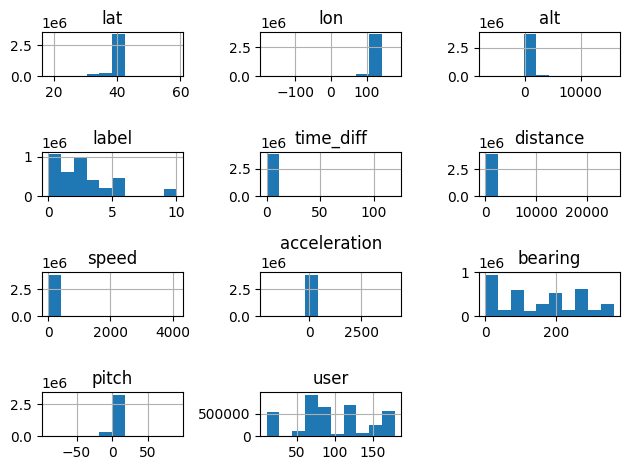

In [5]:
train_df.hist()
plt.tight_layout()

In [6]:
test_df = pd.read_csv("/kaggle/input/geolife-data/geolife_test_filtered_df.csv")
test_df

,lat,lon,alt,time,label,tid,time_diff,partition,distance,speed,acceleration,bearing,pitch,user
0,31.445261,91.989716,4518.9648,2008-10-01 05:53:47,0,010_100,0.0,010_100_0,0.000000,0.000000,0.000000,0.000000,0.000000,10
1,31.445261,91.989716,4518.9648,2008-10-01 05:53:48,0,010_100,1.0,010_100_0,0.000000,0.000000,0.000000,0.000000,0.000000,10
2,31.445261,91.989716,4518.9648,2008-10-01 05:53:49,0,010_100,1.0,010_100_0,0.000000,0.000000,0.000000,0.000000,0.000000,10
3,31.445261,91.989716,4519.8792,2008-10-01 05:53:50,0,010_100,1.0,010_100_0,0.914400,0.914400,0.914400,0.000000,90.000000,10
4,31.445261,91.989716,4519.8792,2008-10-01 05:53:52,0,010_100,2.0,010_100_0,0.000000,0.000000,-0.457200,0.000000,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959588,39.994419,116.325336,80.1624,2008-09-08 05:34:25,0,179_99,2.0,179_99_3,8.144494,4.072247,1.827095,244.094490,0.000000,179
959589,39.994389,116.325263,80.1624,2008-09-08 05:34:27,0,179_99,2.0,179_99_3,7.056891,3.528446,-0.271901,241.789812,0.000000,179
959590,39.994374,116.325201,80.1624,2008-09-08 05:34:29,0,179_99,2.0,179_99_3,5.538716,2.769358,-0.379544,252.473989,0.000000,179
959591,39.994372,116.325168,80.1624,2008-09-08 05:34:31,0,179_99,2.0,179_99_3,2.819963,1.409981,-0.679688,265.476815,0.000000,179


In [7]:
test_df.describe()

,lat,lon,alt,label,time_diff,distance,speed,acceleration,bearing,pitch,user
count,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000,959593.000000
mean,39.393988,114.601910,191.335325,2.188035,2.599460,16.304968,6.568493,0.035089,148.941512,0.272792,94.254330
std,2.411951,14.132974,730.862741,2.294542,4.611341,69.903692,10.596005,1.896243,114.006007,16.055305,49.232252
min,18.250557,-168.184927,-6458.986320,0.000000,0.000000,0.000000,0.000000,-432.439569,0.000000,-90.000000,10.000000
25%,39.911952,116.311132,6.096000,0.000000,1.000000,1.000754,0.511204,-0.176844,36.490524,0.000000,67.000000
50%,39.974627,116.339182,42.062400,2.000000,2.000000,4.226266,2.091501,0.000000,164.937457,0.000000,85.000000
75%,39.991600,116.418897,62.179200,3.000000,2.000000,15.903796,8.848339,0.185325,265.740046,0.000000,128.000000
max,58.657223,126.997961,15837.011760,10.000000,120.000000,17449.193621,2162.197843,717.059772,359.976139,90.000000,179.000000


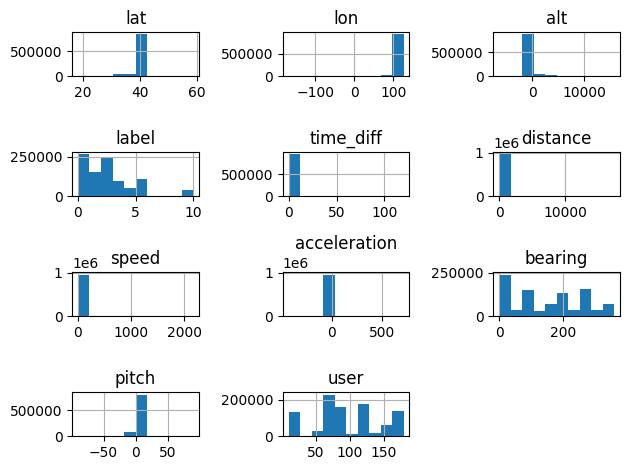

In [8]:
test_df.hist()
plt.tight_layout()

# Make dataset

In [9]:
# cols = ['lat', 'lon', 'alt', 'time_diff', 'distance', 
#         'speed', 'acceleration', 'bearing', 'pitch']

cols = ['lat', 'lon', 'alt', 'time_diff', 'distance', 'speed', 'acceleration']

In [10]:
train_df_partition = list(train_df.groupby('partition'))
test_df_partition = list(test_df.groupby('partition'))

In [11]:
train_df_partition[0][1][cols].values.shape, test_df_partition[0][1][cols].values.shape

((100, 7), (66, 7))

In [12]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset


# 1. Subclass torch.utils.data.Dataset
class DatasetCustom(Dataset):
    
    # 2. Initialize with a target_dir and transform (optional) parameter
    def __init__(self, df, cols = None, label_y = 'label'):
        self.df = df
        self.cols = cols
        self.label_y = label_y
        
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.df)
    
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int):
        "Returns one sample of data, data and label (X, y)."
        if self.cols != None:
            X = self.df[index][1][cols].values
        else:
            X = self.df[index][1].values
        
        y = self.df[index][1][self.label_y].iloc[0]
        
        return torch.tensor(X).type(torch.float), torch.tensor(y)
        

In [13]:
train_dataset = DatasetCustom(df = train_df_partition, cols = cols)
test_dataset = DatasetCustom(df = test_df_partition, cols = cols)

In [14]:
len(train_dataset), len(test_dataset)

(42728, 10682)

In [15]:
train_dataset[0][0].shape, train_dataset[0][1].shape, train_dataset[0][1]

(torch.Size([100, 7]), torch.Size([]), tensor(0))

In [16]:
test_dataset[0][0].shape, train_dataset[0][1].shape, test_dataset[0][1]

(torch.Size([66, 7]), torch.Size([]), tensor(0))

# Prepare dataloader

In [17]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    # Separate data and labels
    sequences, labels = zip(*batch)
    # Pad the sequences
    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=0)
    
    labels_tensor = torch.stack(labels)
    return padded_sequences, labels_tensor

In [18]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 1024
NUM_CORES = os.cpu_count() 


train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn = collate_fn, num_workers = NUM_CORES, pin_memory = True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn = collate_fn, num_workers = NUM_CORES, pin_memory = True)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of training dataset: {len(train_dataloader.dataset)}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataset: {len(test_dataloader.dataset)}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b87ce5bc6d0>, <torch.utils.data.dataloader.DataLoader object at 0x7b87ce5bc4f0>)
Length of training dataset: 42728
Length of train dataloader: 42 batches of 1024
Length of test dataset: 10682
Length of test dataloader: 11 batches of 1024


In [19]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([1024, 100, 7]), torch.Size([1024]))

In [20]:
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([1024, 100, 7]), torch.Size([1024]))

# Model_architecture

In [21]:
class LSTM_Model(torch.nn.Module):
    def __init__(self, embedding_size, hidden_state_size, output_size, bidirectional = False):
        super().__init__()
        
        self.lstm = torch.nn.LSTM(
            input_size = embedding_size,
            hidden_size = hidden_state_size,
            batch_first = True,
            bias = True,
            bidirectional = bidirectional
        )
        
        if bidirectional == False:
            self.classifier = torch.nn.Sequential(
                nn.LayerNorm(hidden_state_size),
                nn.Linear(hidden_state_size, hidden_state_size),
                nn.ReLU(),
                nn.LayerNorm(hidden_state_size),
                nn.Linear(hidden_state_size, hidden_state_size),
                nn.ReLU(),
                nn.LayerNorm(hidden_state_size),
                nn.Linear(hidden_state_size, output_size)
            )
        else:
            self.classifier = torch.nn.Sequential(
                nn.LayerNorm(2*hidden_state_size),
                nn.Linear(2*hidden_state_size, 2*hidden_state_size),
                nn.ReLU(),
                nn.LayerNorm(2*hidden_state_size),
                nn.Linear(2*hidden_state_size, 2*hidden_state_size),
                nn.ReLU(),
                nn.LayerNorm(2*hidden_state_size),
                nn.Linear(2*hidden_state_size, output_size)
            )
        
        
    def forward(self,x):
        # x_shape = [N,seq,features]
        out, (hn, cn) = self.lstm(x)
        # output_LSTM_shape = [N,seq,hidden_size]; 
        # hidden_LSTM_shape = [D,N,hidden_size]; 
        # cell_LSTM_shape = [D,N,hidden_size]
        hn = hn.permute(1,0,2)
        hn = hn.reshape(hn.shape[0],-1)
        out = self.classifier(hn)
        # output_linear_shape = [N, output_size]
        return out

# LSTM

In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = LSTM_Model(embedding_size = len(cols),
                   hidden_state_size = 128,
                   output_size = 11)
model_0

LSTM_Model(
  (lstm): LSTM(7, 128, batch_first=True)
  (classifier): Sequential(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
    (3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (7): Linear(in_features=128, out_features=11, bias=True)
  )
)

## Train model

In [23]:
# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

In [24]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn: torchmetrics,
               device: torch.device = 'cpu'):
    
    if device != 'cpu':
        model.to(device)
        accuracy_fn.to(device)
    
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        if device != 'cpu':
            X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
#         print(f'y_pred: {y_pred}')

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
#         print(f'train_loss/batch: {train_loss}')
        
#         print(f'batch {batch}')
#         if math.isnan(loss):
#             print(X.shape)
    
        # 3. Calculate accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += accuracy_fn(y, y_pred_class) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    
    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
		
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn: torchmetrics,
              device: torch.device = 'cpu'):
    
    if device != 'cpu':
        model.to(device)
        accuracy_fn.to(device)

    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            if device != 'cpu':
                X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            y_pred = model(X)
            
            # 2. Calculate loss
            test_loss += loss_fn(y_pred, y)
						
            # 3. Calculate accuracy
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += accuracy_fn(y, y_pred_class) # Go from logits -> pred labels
            
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
		
    return test_loss, test_acc

In [25]:
from typing import Dict, List, Tuple

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          accuracy_fn: torchmetrics,
          epochs: int,
          device: torch.device = 'cpu') -> Dict[str, List]:
    
    # Create empty results dictionary
    results = {
        "Training_Loss": [],
        "Training_Acc": [],
        "Test_Loss": [],
        "Test_Acc": []
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
            Training_Loss, Training_Acc = train_step(
                data_loader=train_dataloader, 
                model=model, 
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device
            )
            Test_Loss, Test_Acc = test_step(
                data_loader=test_dataloader,
                model=model,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device
            )
            # Print out what's happening
            print(
                f"Epoch: {epoch} | "
                f"Training_Loss: {Training_Loss:.4f} | "
                f"Training_Acc: {Training_Acc:.4f} | "
                f"Test_Loss: {Test_Loss:.4f} | "
                f"Test_Acc: {Test_Acc:.4f}"
            )

            # Update results dictionary
            results["Training_Loss"].append(Training_Loss.item())
            results["Training_Acc"].append(Training_Acc.item())
            results["Test_Loss"].append(Test_Loss.item())
            results["Test_Acc"].append(Test_Acc.item())

  # Return the filled results at the end of the epochs
    return results

In [26]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
accuracy_fn = torchmetrics.F1Score(task = 'multiclass', num_classes=11)

In [27]:
from tqdm.auto import tqdm

set_seeds()

# Setup the num_epochs hyperparameter
NUM_EPOCHS = 200


results = train(model=model_0,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader, 
                optimizer=optimizer,
                loss_fn=loss_fn,
                accuracy_fn = accuracy_fn,
                epochs=NUM_EPOCHS,
                device='cuda')

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 0 | Training_Loss: 1.9759 | Training_Acc: 0.2527 | Test_Loss: 1.7256 | Test_Acc: 0.3190
Epoch: 1 | Training_Loss: 1.7530 | Training_Acc: 0.3229 | Test_Loss: 1.5318 | Test_Acc: 0.4069
Epoch: 2 | Training_Loss: 1.6046 | Training_Acc: 0.4179 | Test_Loss: 1.4459 | Test_Acc: 0.4495
Epoch: 3 | Training_Loss: 1.5451 | Training_Acc: 0.4430 | Test_Loss: 1.4700 | Test_Acc: 0.4423
Epoch: 4 | Training_Loss: 1.4906 | Training_Acc: 0.4625 | Test_Loss: 1.3649 | Test_Acc: 0.4899
Epoch: 5 | Training_Loss: 1.4438 | Training_Acc: 0.4953 | Test_Loss: 1.3332 | Test_Acc: 0.5142
Epoch: 6 | Training_Loss: 1.4026 | Training_Acc: 0.5197 | Test_Loss: 1.2931 | Test_Acc: 0.5516
Epoch: 7 | Training_Loss: 1.3738 | Training_Acc: 0.5361 | Test_Loss: 1.2787 | Test_Acc: 0.5267
Epoch: 8 | Training_Loss: 1.3380 | Training_Acc: 0.5412 | Test_Loss: 1.2884 | Test_Acc: 0.5192
Epoch: 9 | Training_Loss: 1.3482 | Training_Acc: 0.5461 | Test_Loss: 1.2781 | Test_Acc: 0.5310
Epoch: 10 | Training_Loss: 1.3507 | Training_Acc: 

## Plot training results

In [28]:
def plot_results(Training_Loss, Training_Acc, Test_Loss, Test_Acc):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(Training_Loss, color="blue", label="Training Loss")
    plt.plot(Test_Loss, color="green", label="Test Loss")
    plt.title("Training and Test Loss curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss value")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(Training_Acc, color="blue", label="Training Accuracy")
    plt.plot(Test_Acc, color="green", label="Test Accuracy")
    plt.title("Training and Test Accuracy curves")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy value")
    plt.legend()

    plt.tight_layout()
    plt.show()

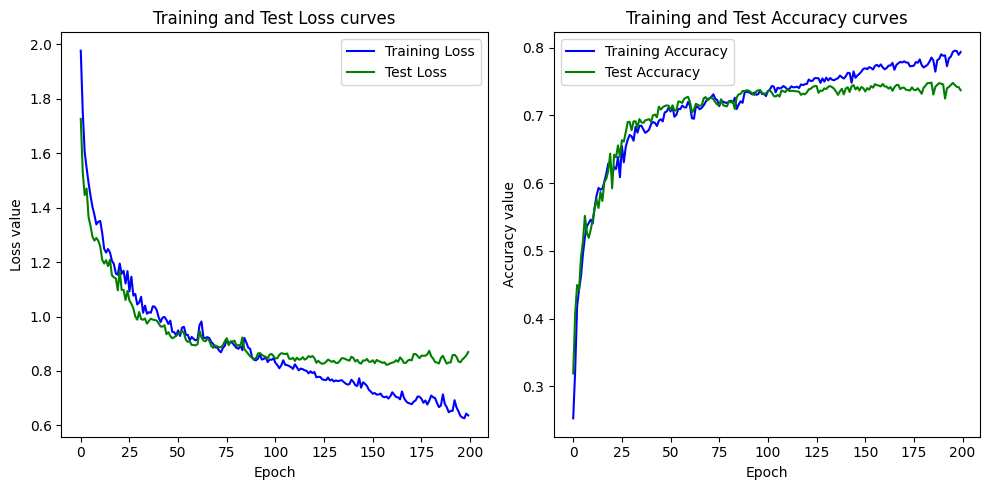

In [29]:
plot_results(results["Training_Loss"], results["Training_Acc"], results["Test_Loss"], results["Test_Acc"])

# Bi-LSTM

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = LSTM_Model(embedding_size = len(cols),
                     hidden_state_size = 128,
                     output_size = 11,
                     bidirectional=True
                    )
model_1

LSTM_Model(
  (lstm): LSTM(7, 128, batch_first=True, bidirectional=True)
  (classifier): Sequential(
    (0): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): ReLU()
    (3): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (7): Linear(in_features=256, out_features=11, bias=True)
  )
)

## Train model

In [31]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
accuracy_fn = torchmetrics.F1Score(task = 'multiclass', num_classes=11)

In [32]:
from tqdm.auto import tqdm

set_seeds()

# Setup the num_epochs hyperparameter
NUM_EPOCHS = 200

results = train(model=model_1,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                accuracy_fn = accuracy_fn,
                epochs=NUM_EPOCHS,
                device='cuda')

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 0 | Training_Loss: 2.0716 | Training_Acc: 0.2509 | Test_Loss: 1.7676 | Test_Acc: 0.3017
Epoch: 1 | Training_Loss: 1.8242 | Training_Acc: 0.3173 | Test_Loss: 1.5459 | Test_Acc: 0.3860
Epoch: 2 | Training_Loss: 1.5767 | Training_Acc: 0.4131 | Test_Loss: 1.5442 | Test_Acc: 0.3912
Epoch: 3 | Training_Loss: 1.5272 | Training_Acc: 0.4422 | Test_Loss: 1.3587 | Test_Acc: 0.4459
Epoch: 4 | Training_Loss: 1.4323 | Training_Acc: 0.5028 | Test_Loss: 1.2877 | Test_Acc: 0.5447
Epoch: 5 | Training_Loss: 1.4240 | Training_Acc: 0.4951 | Test_Loss: 1.4424 | Test_Acc: 0.4789
Epoch: 6 | Training_Loss: 1.4072 | Training_Acc: 0.5145 | Test_Loss: 1.3328 | Test_Acc: 0.5050
Epoch: 7 | Training_Loss: 1.3719 | Training_Acc: 0.5313 | Test_Loss: 1.2199 | Test_Acc: 0.5828
Epoch: 8 | Training_Loss: 1.2920 | Training_Acc: 0.5618 | Test_Loss: 1.2198 | Test_Acc: 0.5600
Epoch: 9 | Training_Loss: 1.2858 | Training_Acc: 0.5570 | Test_Loss: 1.1832 | Test_Acc: 0.5971
Epoch: 10 | Training_Loss: 1.2585 | Training_Acc: 

## Plot training results

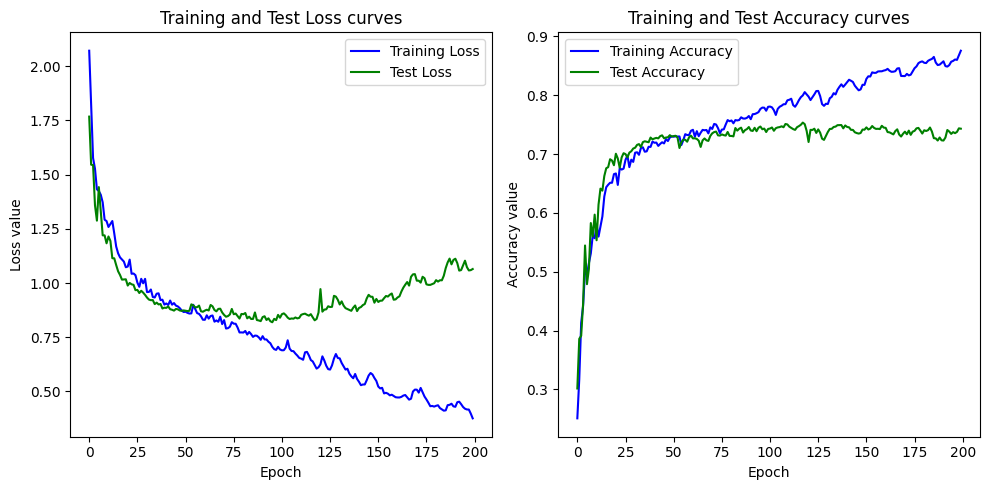

In [33]:
plot_results(results["Training_Loss"], results["Training_Acc"], results["Test_Loss"], results["Test_Acc"])

# Evaluation

In [34]:
BATCH_SIZE = 1024
eval_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn = collate_fn, num_workers = NUM_CORES, pin_memory = True)

# Let's check out what we've created
print(f"Dataloaders: {eval_dataloader}") 
print(f"Length of eval dataset: {len(eval_dataloader.dataset)}")
print(f"Length of eval dataloader: {len(eval_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7b88cfe46fe0>
Length of eval dataset: 10682
Length of eval dataloader: 11 batches of 1024


In [35]:
features_batch, labels_batch = next(iter(eval_dataloader))
features_batch.shape, labels_batch.shape

(torch.Size([1024, 100, 7]), torch.Size([1024]))

## LSTM

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = 0
precision = 0
recall = 0
f1 = 0

for X, y in eval_dataloader:
    y_pred_0 = model_0(X.cuda())
    y_pred_class_0 = torch.argmax(torch.softmax(y_pred_0, dim=1), dim=1)
    
    accuracy += accuracy_score(y, y_pred_class_0.cpu())
    precision += precision_score(y, y_pred_class_0.cpu(), average = 'weighted')
    recall += recall_score(y, y_pred_class_0.cpu(), average = 'weighted')
    f1 += f1_score(y, y_pred_class_0.cpu(), average = 'weighted')
    
accuracy /= len(eval_dataloader)
precision /= len(eval_dataloader)
recall /= len(eval_dataloader)
f1 /= len(eval_dataloader)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [37]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.7369873348159195
0.7741567752692433
0.7369873348159195
0.7383774132182128


## Bi-LSTM

In [38]:
y_pred_1 = model_1(features_batch.cuda())
y_pred_class_1 = torch.argmax(torch.softmax(y_pred_1, dim=1), dim=1)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = 0
precision = 0
recall = 0
f1 = 0

for X, y in eval_dataloader:
    y_pred_1 = model_1(X.cuda())
    y_pred_class_1 = torch.argmax(torch.softmax(y_pred_1, dim=1), dim=1)
    
    accuracy += accuracy_score(y, y_pred_class_1.cpu())
    precision += precision_score(y, y_pred_class_1.cpu(), average = 'weighted')
    recall += recall_score(y, y_pred_class_1.cpu(), average = 'weighted')
    f1 += f1_score(y, y_pred_class_1.cpu(), average = 'weighted')
    
accuracy /= len(eval_dataloader)
precision /= len(eval_dataloader)
recall /= len(eval_dataloader)
f1 /= len(eval_dataloader)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [40]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.7431825412638831
0.7784430491994595
0.7431825412638831
0.7495117137906402
